### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# **Exploratory data**

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('student_scores.csv')
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Feature Engineering**

In [ ]:
df.duplicated().sum()

0

tidak ada data yang duplikat/sama

In [ ]:
df.isnull().sum()

,0
Hours,0
Scores,0


tidak ada missing values

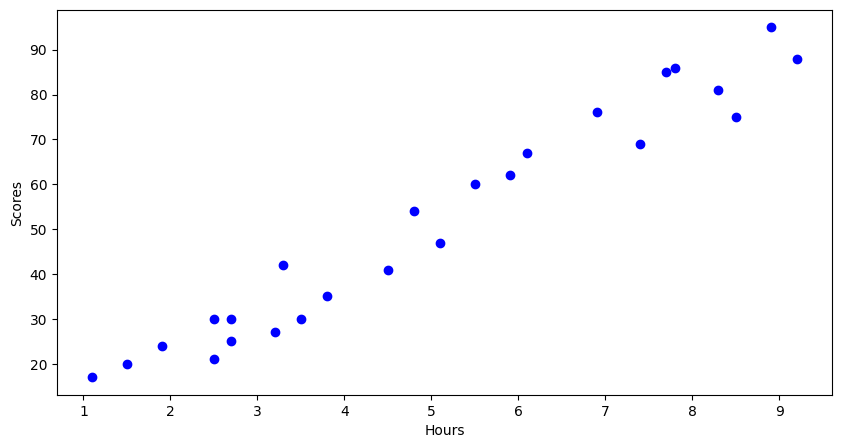

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(df['Hours'], df['Scores'],
            color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
df['Hours'].corr(df['Scores'])

0.9761906560220887

# **Modeling**

In [ ]:
X = df[['Hours']]
y = df['Scores']


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as py

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
print("\nEvaluasi Model:")
print("Linear Regression:")
print(f"MSE: {lr_mse:.2f}")
print(f"R-squared: {lr_r2:.2f}")


Evaluasi Model:
Linear Regression:
MSE: 18.94
R-squared: 0.97


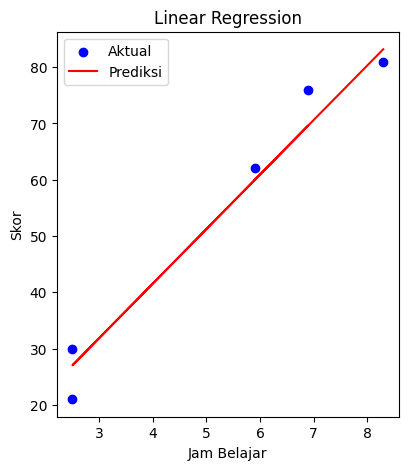

In [ ]:
plt.figure(figsize=(15,5))

# Linear Regression
plt.subplot(1,3,1)
plt.scatter(X_test, y_test, color='blue', label='Aktual')
plt.plot(X_test, lr_pred, color='red', label='Prediksi')
plt.title('Linear Regression')
plt.xlabel('Jam Belajar')
plt.ylabel('Skor')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [ ]:
print("\nRandom Forest Regressor:")
print(f"MSE: {rf_mse:.2f}")
print(f"R-squared: {rf_r2:.2f}")


Random Forest Regressor:
MSE: 13.05
R-squared: 0.98


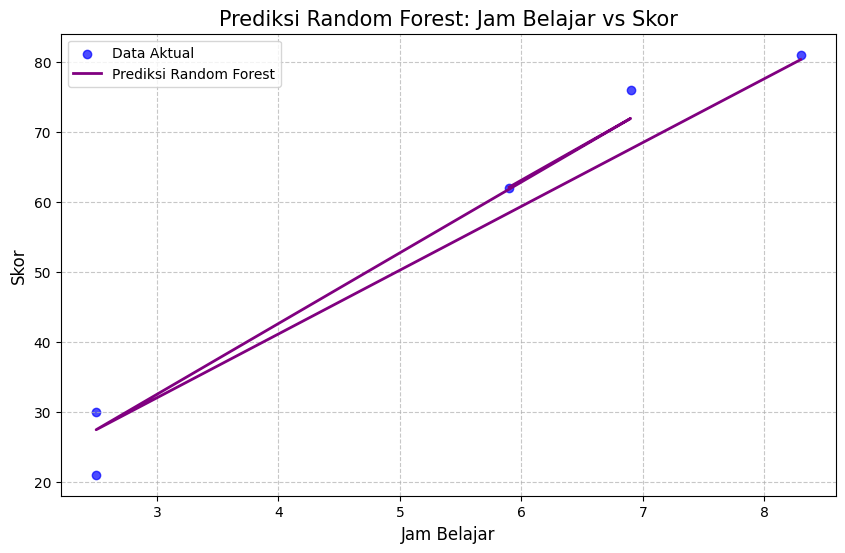

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, color='blue', label='Data Aktual', alpha=0.7)

plt.plot(X_test, rf_pred, color='purple', label='Prediksi Random Forest', linewidth=2)

plt.title('Prediksi Random Forest: Jam Belajar vs Skor', fontsize=15)
plt.xlabel('Jam Belajar', fontsize=12)
plt.ylabel('Skor', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

Kesimpulan:

Tidak ada data duplikat

Tidak ada missing values

Terdapat korelasi positif antara jam belajar dan skor

Berdasarkan evaluasi model:

Linear Regression: R² = 0.97, MSE = 18.84

Random Forest: R² = 0.98, MSE = 13.05

Model terbaik adalah Random Forest dengan R²
tertinggi (0.98) dan MSE terendah (13.05).